In [1]:
# Read 
import re
import fitz
import unicodedata
import matplotlib.pyplot as plt
from PIL import Image, ImageQt

import numpy as np

In [2]:
# Read image from mupdf
from time import time
strt = time()

def read_image_mupdf(path):
    doc=fitz.open(path)
    a = doc.loadPage(1)
    img_page = dict()
    for page in doc:
        pix = page.getPixmap()

        # set the mode depending on alpha
        mode = "RGBA" if pix.alpha else "RGB"
        img = Image.frombytes(mode, [pix.width, pix.height], pix.samples)
        img_array = np.array(img)
        img_page[page.number] = img_array
    return img_page

In [34]:



def clean_text(text: str) -> str:
    """
    Function to remove unicode from text.
    """
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'replace')
    text = text.decode()
    text = ' '.join(text.split()).strip()
    text = text.replace("?", "-")
    text = re.sub(r"\s+", " ", text)
    return text


def get_parsed_text(pdf):
    page_bbox = dict()
    doc = fitz.open(pdf)
    nodes = []
    node_id = 0; line_no = 0
    for page in doc:
        page_bbox[page.number] = list(page.bound())
        blocks = page.getText("dict")["blocks"]
        block_no = 0
        for b in blocks:  # iterate through the text blocks
            found_txt = False
            if b['type'] == 0:  # block contains text
                for l in b["lines"]:  # iterate through the text lines
                    for s in l["spans"]:  # iterate through the text spans
                        txt = clean_text(s["text"].strip())
                        if txt:
                            if node_id > 0:
                                prev_node = nodes[-1]
                                if len(prev_node["text"]) == 1:
                                    x_diff = abs(s["bbox"][0] - prev_node["bbox"][2])
                                    y_diff = abs(s["bbox"][1] - prev_node["bbox"][1])
                                    if y_diff < 10:
                                        if x_diff < 20 and x_diff > 0:
                                            prev_node["text"] += " " + s["text"]
                                            prev_node["bbox"][2] = s["bbox"][2]
                                            continue
                                y_diff = abs(s["bbox"][1] - prev_node["bbox"][1])
                                if y_diff < 10:
                                    line_no = prev_node["line_no"]
                            nodes.append({"node_id": node_id,
                                        "line_no": line_no,
                                        "block_no": block_no,
                                        "text": txt,
                                        "bbox": list(s["bbox"]),
                                         "page_no":page.number})
                            node_id += 1
                            line_no += 1
                            found_txt = True
            if found_txt:
                block_no += 1

    #return [(n["node_id"], n["line_no"], n["text"], n["text"]) for n in nodes]
    return nodes, page_bbox


In [35]:
path = '../../parseltongue-pkg/node_cont_resumes/424.pdf'

#path = '../../parseltongue-pkg/mimir_deug_csv/prod_resumes/'
# Table
#path =  '../../../../Data/resumes_dump/8158b858-59e5-493c-b8e6-f01ec5455d54.pdf'

# Two column
#path =  '../../../../Data/resumes_dump/1829354c-e568-4878-b303-e896d7d31e6d.pdf'

In [36]:
nodes, page_bbox = get_parsed_text(path)
img_page = read_image_mupdf(path)

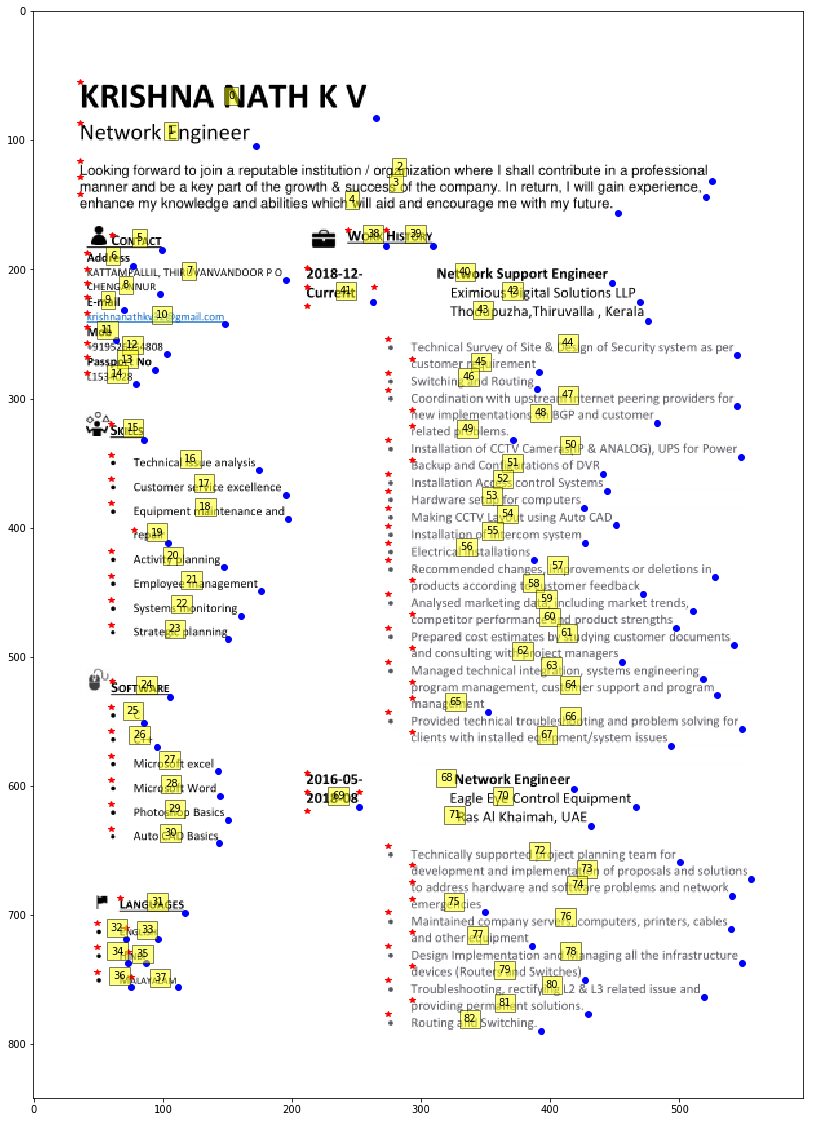

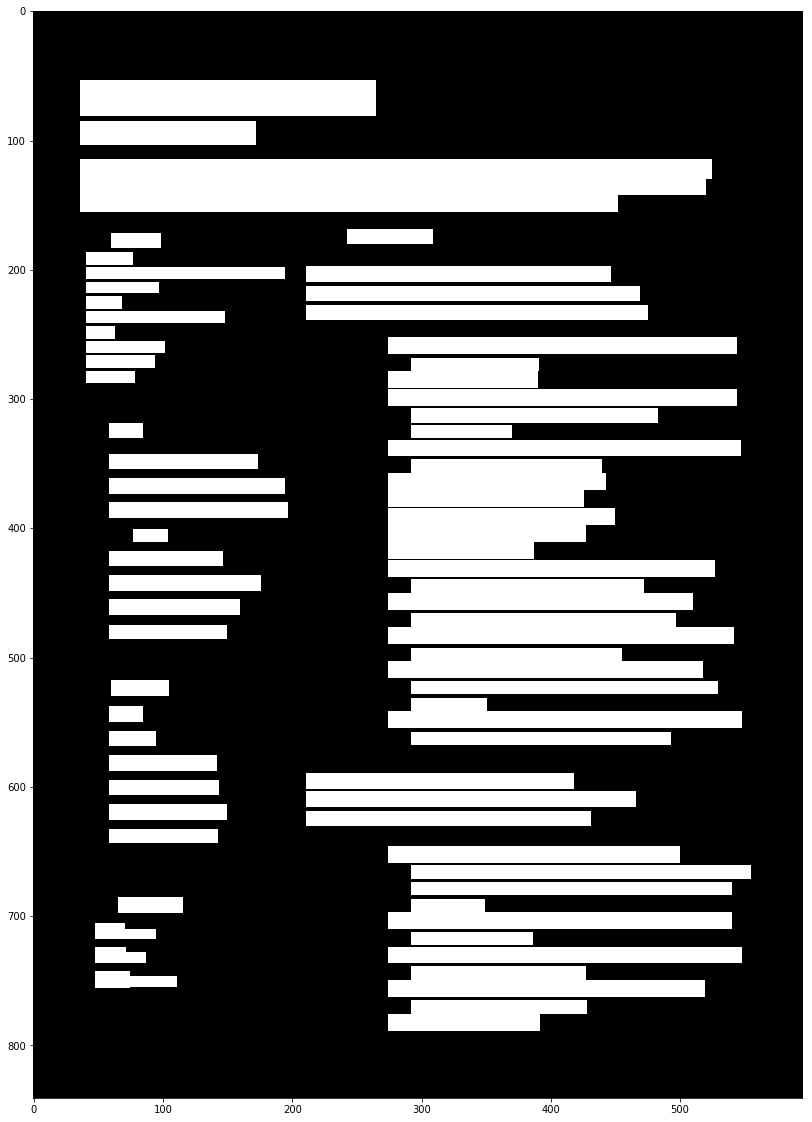

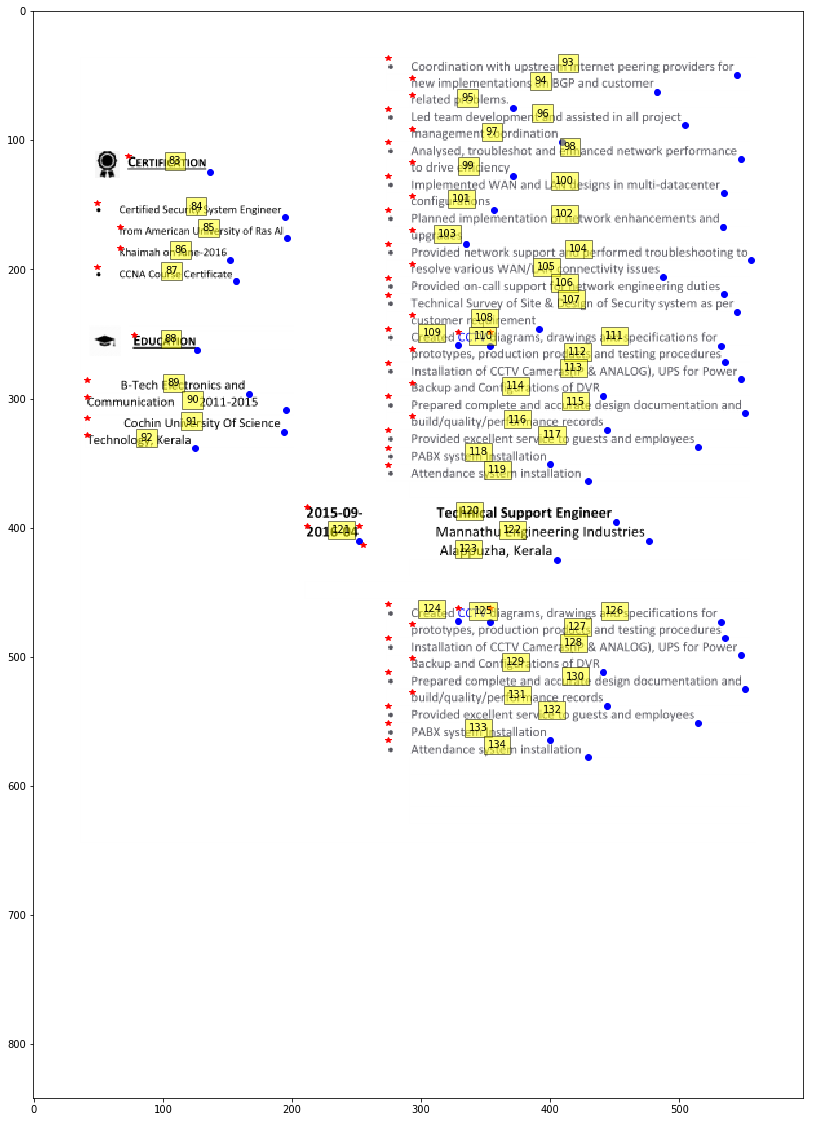

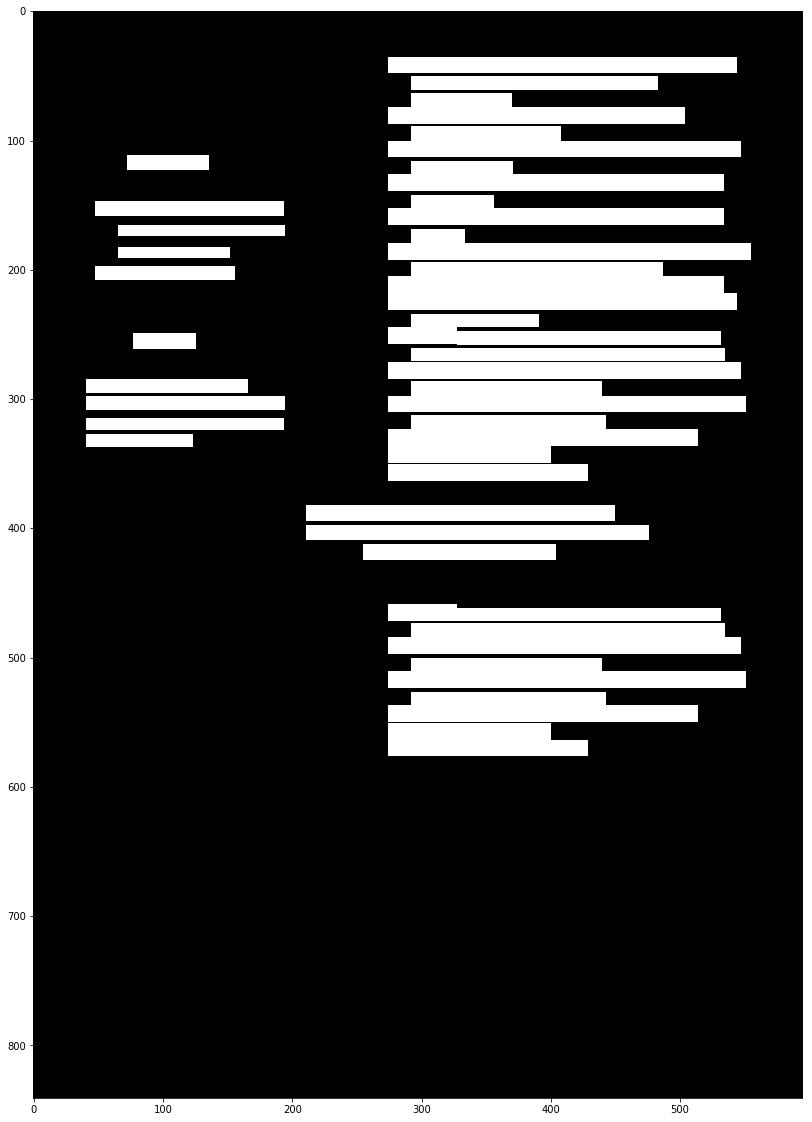

In [37]:
n = 0
n_text = 0
for page_no in img_page:
    rat_yx = page_bbox[page_no][3]/ page_bbox[page_no][3]
    
    
    img_gen = np.zeros((int(page_bbox[page_no][3]), int(page_bbox[page_no][2])))
    nodes_bbox = [n['bbox'] for n in nodes if n['page_no'] == page_no ]
    nodes_text = [n['text'] for n in nodes if n['page_no'] == page_no ]
    #for ind,bbox in enumerate(nodes_bbox):
    #    print(n_text,":", nodes_text[ind])
     #   n_text +=1
    
    plt.figure(figsize = (20,20*rat_yx))
    plt.imshow(img_page[page_no])
    for ind,bbox in enumerate(nodes_bbox):
        plt.plot(bbox[0], bbox[1], 'r*')
        plt.plot(bbox[2], bbox[3], 'bo')
        bbox = [int(i)  for i in bbox ]
        plt.text((bbox[0] + bbox[2])/2, (bbox[1] +bbox[3])/2,str(n),bbox=dict(facecolor='yellow', alpha=0.5))
        
        
        n+=1
        
        img_gen[bbox[1]:bbox[3],bbox[0]:bbox[2]]=1
        
        
    
    
    plt.figure(figsize = (20,20*rat_yx))
    plt.imshow(img_gen, cmap = 'gray')

In [42]:
for ind, n in enumerate(nodes):
    print(ind, n['text'])
    

0 KRISHNA NATH K V
1 Network Engineer
2 Looking forward to join a reputable institution / organization where I shall contribute in a professional
3 manner and be a key part of the growth & success of the company. In return, I will gain experience,
4 enhance my knowledge and abilities which will aid and encourage me with my future.
5 C ONTACT
6 Address
7 KATTAMPALLIL, THIRUVANVANDOOR P O
8 CHENGANNUR
9 E-mail
10 krishnanathkv32@gmail.com
11 Mob
12 +919526054808
13 Passport No
14 L1534028
15 S KILLS
16 - Technical issue analysis 
17 - Customer service excellence 
18 - Equipment maintenance and 
19 repair
20 - Activity planning 
21 - Employee management 
22 - Systems monitoring 
23 - Strategic planning
24 S OFTWARE
25 - C 
26 - C++ 
27 - Microsoft excel 
28 - Microsoft Word 
29 - Photoshop Basics 
30 - Auto CAD Basics
31 L ANGUAGES
32 - E
33 NGLISH
34 - H
35 INDI
36 - M
37 ALAYALAM
38 W ORK 
39 H ISTORY
40 2018-12- Network Support Engineer
41 Current
42 Eximious Digital Solutions LLP
43 T

In [39]:
(bbox[0] + bbox[2])/2, (bbox[1] +bbox[3])/2

(351.5, 570.5)

In [83]:

strt = time()
doc=fitz.open(path)
for page in doc:
    pix = page.getPixmap()

    # set the mode depending on alpha
    mode = "RGBA" if pix.alpha else "RGB"
    img = Image.frombytes(mode, [pix.width, pix.height], pix.samples)
    break
    
print(time() -  strt)

0.038942813873291016


In [26]:
doc = fitz.open(path)
nodes = []
node_id = 0; line_no = 0
for page in doc:
    page_bbox[page.number] = list(page.bound())
    blocks = page.getText("dict")["blocks"]
    block_no = 0
    for b in blocks:  # iterate through the text blocks
        found_txt = False
        if b['type'] == 0:  # block contains text
            for l in b["lines"]:  # iterate through the text lines
                for s in l["spans"]:  # iterate through the text spans
                    txt = clean_text(s["text"].strip())
                    if txt:
                        print(txt)

RIDHI JAIN
Phone: +91 8884608698
ASSOCIATE TECHNOLOGY L1
E-mail: ridhijain.07@gmail.com
____________________________________________________________________________________________________________________
QUICK PROFILE
I am currently working as a Hybris developer in Sapient Consulting Pvt. Ltd., India with a degree in Bachelor of
Technology in Electronics and Communication Engineering. I have 1 year and 8 months of experience in the IT
industry having worked as a Java Developer for web-based applications and as a Hybris Developer.
EXPERIENCE DETAILS
Sapient Corporation, Bengaluru (May 2014
-
Present)
-
1.5 year of experience in Hybris eCommerce platform.
-
Good working knowledge of the Hybris modules - Solr Facets, Product Module, Account Module, Report
Cockpit and CMS Cockpit.
-
Good expertise in writing Impexes and Flexible Search Queries.
-
Worked on configuration management tools like Tortoise SVN and Star Team.
-
Good knowledge of JAVA Enterprise Edition, Spring MVC and writing ba

[0.0, 0.0, 595.3200073242188, 841.9199829101562]